# 200_RQ2-How hast the industry grown over the thirty years and how can you make the most money in the industry now.

In this notebook we will answer our second research question which is based on the industry growth over the thirty years.

Firstly we will look at how the industry has grown and how more companies got involved in it. We will then see what type of game a prson should make to make the most money and look at which developer and publisher to go with. We will also see what console is the best to release on.

## Datasets

- Input: 200_Industry_Growth_Sales.pkl && 200_Industry_Growth_Counts.pkl
- Output: n/a

In [1]:
import os 
import sys
import pandas as pd
import numpy as np 
import hashlib 
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline 

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, linees, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 22

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [3]:
if not os.path.exists("../../data/analysis/200_Industry_Growth_Sales.pkl"):
    print("Missing Dataset File")

In [4]:
if not os.path.exists("../../data/analysis/200_Industry_Growth_Counts.pkl"):
    print("Missing Dataset File")

## Loading the datasets

In [5]:
sales = pd.read_pickle("../../data/analysis/200_Industry_Growth_Sales.pkl")
sales.shape

(37, 48)

In [6]:
counts = pd.read_pickle("../../data/analysis/200_Industry_Growth_Counts.pkl")
counts.shape

(37, 17)

## Overview of datasets

In [7]:
sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Action,Adventure,Sports,Platform,Racing,...,DC,PSV,SAT,SCD,WS,NG,TG16,3DO,GG,PCFX
Year_of_Release,,,,,,,,,,,,,,,,,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38,0.34,NaN,0.49,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,33.40,1.96,0.00,0.32,35.77,14.84,NaN,0.79,6.93,0.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,26.92,1.65,0.00,0.31,28.86,6.52,NaN,1.05,5.03,1.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,7.76,0.80,8.10,0.14,16.79,2.86,0.4,3.20,6.93,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,33.28,2.10,14.27,0.70,50.36,1.85,NaN,6.18,0.69,5.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
sales.columns.values

array(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Action', 'Adventure', 'Sports', 'Platform', 'Racing',
       'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation',
       'Fighting', 'Strategy', 'NES', 'Wii', 'GB', 'DS', 'X360', 'PS3',
       'PS2', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600',
       'PSP', 'XOne', 'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS',
       'NG', 'TG16', '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
counts.head()

,Name,Platform,Genre,Publisher,Developer,Action,Adventure,Fighting,Misc,platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,,,,,,
1980.0,9,1,5,2,NaN,1,NaN,1.0,4.0,NaN,NaN,NaN,NaN,2.0,NaN,1,NaN
1981.0,46,1,7,14,NaN,25,NaN,NaN,NaN,3.0,2.0,1.0,NaN,10.0,1.0,4,NaN
1982.0,36,1,7,18,NaN,18,NaN,NaN,1.0,5.0,3.0,2.0,NaN,5.0,NaN,2,NaN
1983.0,17,2,7,4,NaN,7,1.0,NaN,1.0,5.0,1.0,NaN,NaN,1.0,NaN,1,NaN
1984.0,14,2,7,4,NaN,1,NaN,NaN,1.0,1.0,3.0,3.0,NaN,3.0,NaN,2,NaN


# Introduction

We know that the market value of the gaming industry has been steadily increasing. But where does the industry make its money and how has it changed over the years.

## Sales

To start to answer this question we will first look at sales and how they contribute to the profit in the industry. We will also look at how sales have shifted over the thirty years and how trends have changed.

(1980, 2016)

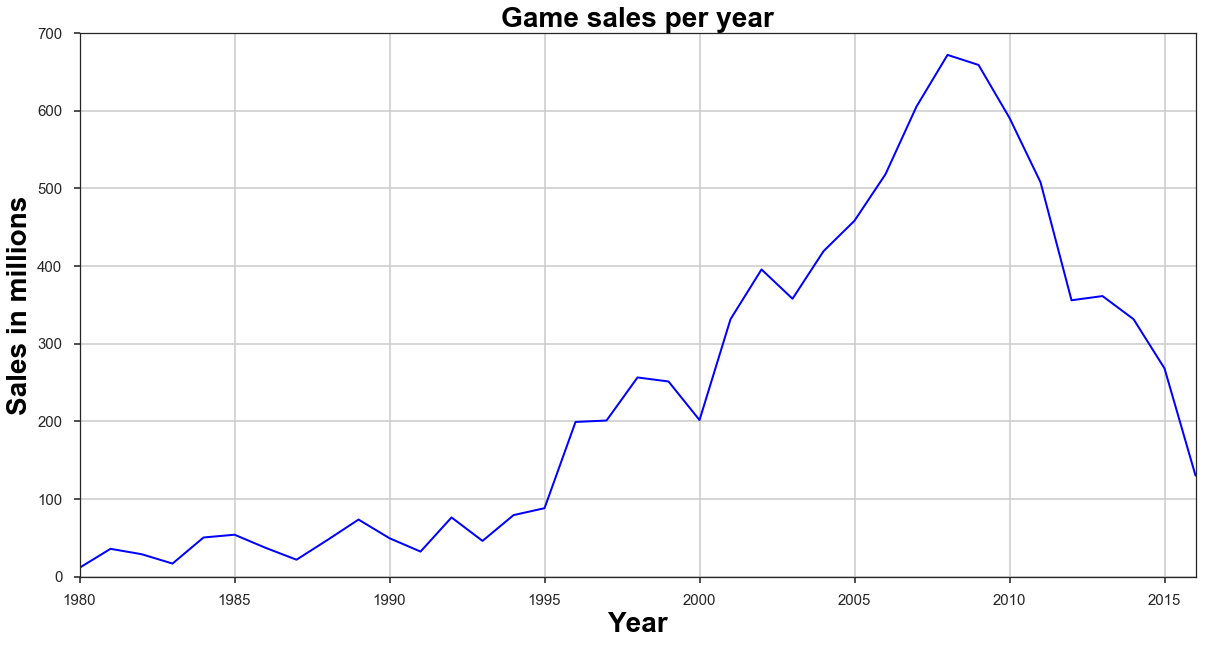

In [10]:
ax = sales['Global_Sales'].plot(kind='line', title="Game sales per year", color = 'b')
ax.set_xlabel("Year")
ax.set_ylabel("Sales in millions")
ax.set_ylim(0, 700)
ax.set_xlim(1980, 2016)

Text(0.5,1,'Yearly game sales per Region')

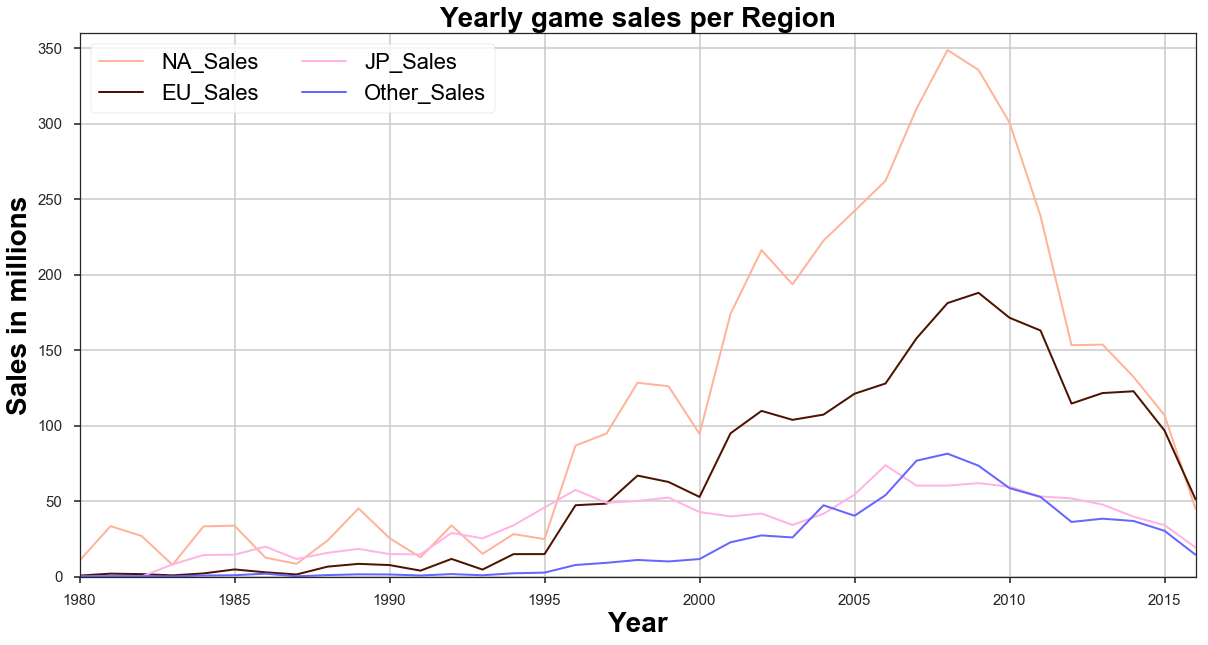

In [11]:
fig, ax = plt.subplots()

ax.plot(sales['NA_Sales'],color = '#ffb399') 
ax.plot(sales['EU_Sales'], color = '#4d1300')
ax.plot(sales['JP_Sales'], color = '#ffb3e6')
ax.plot(sales['Other_Sales'], color = '#6666ff')
 
ax.set_xlabel('Year')
ax.set_ylabel('Sales in millions')

ax.set_xlim(1980, 2016)
ax.set_ylim(0,360)
ax.legend(frameon=True, ncol=2, loc='upper left')
plt.title('Yearly game sales per Region')

The above two graphs show the growth in the industry in terms of game sales. The top graph shows total sales, whereas the bottom graph shows the sales split into regions. We can see a large increase in sales up until the mid to late 2000's where they then began to decline.

In [12]:
sales['Average'] = sales['Global_Sales']/counts['Name']

(1980, 2016)

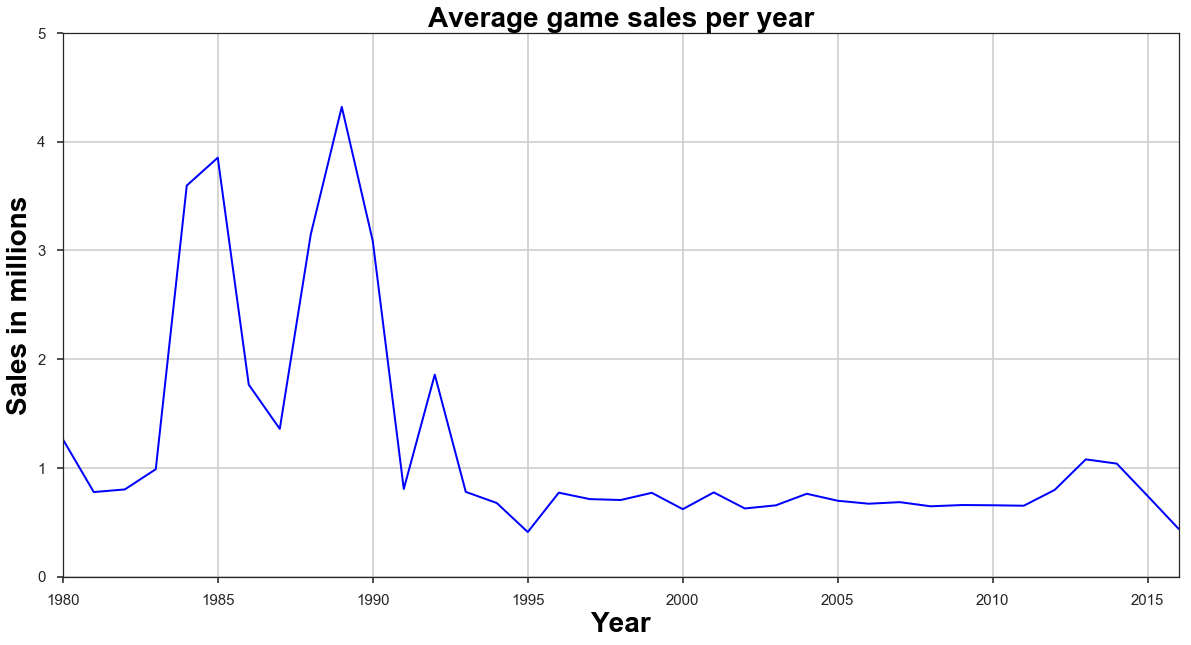

In [13]:
ax = sales['Average'].plot(kind='line', title="Average game sales per year", color = 'b')
ax.set_xlabel("Year")
ax.set_ylabel("Sales in millions")
ax.set_ylim(0, 5)
ax.set_xlim(1980, 2016)

The above shows the average sales that each game generates. Again we see that from 1980 until 1995 this was quite volatile. However this is mainly due to the low amount of games released each year and the amount of games being released going up and down. From 1995 it stays level up until 2011, from here it increases which means companies were making more profits per game. However it has dropped again.

# close look at genres

(1980, 2016)

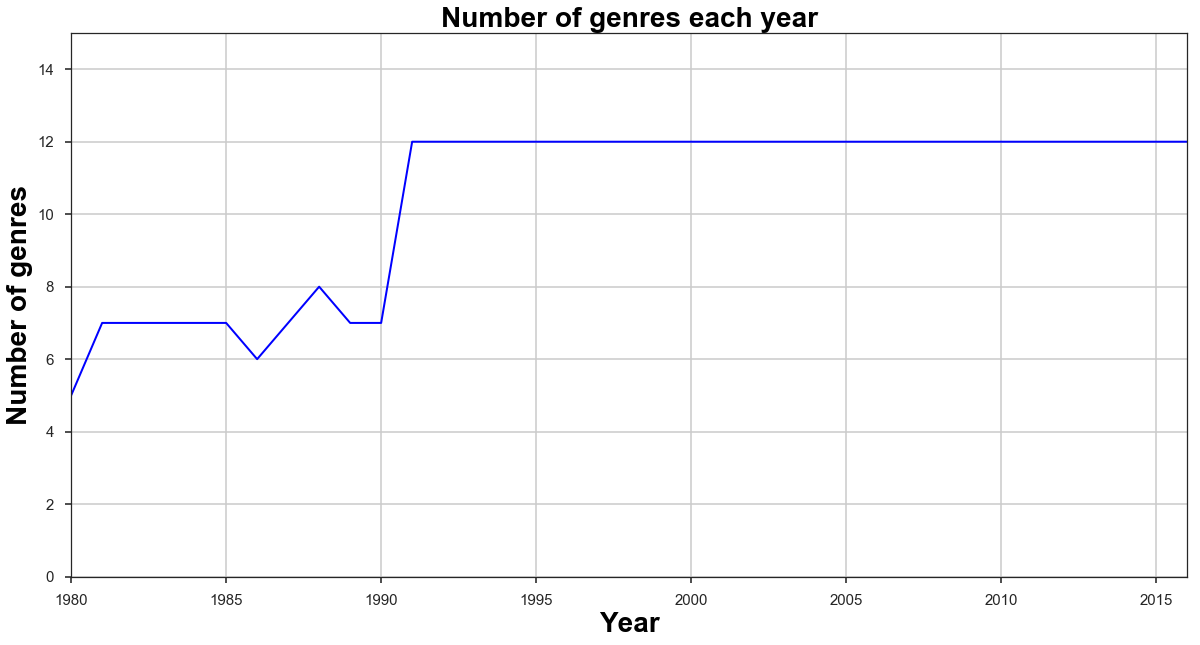

In [14]:
ax = counts['Genre'].plot(kind='line', title="Number of genres each year", color = 'b')
ax.set_xlabel("Year")
ax.set_ylabel("Number of genres")
ax.set_ylim(0, 15)
ax.set_xlim(1980, 2016)

The above graph shows the number of different genre of games being released. We can see a growth in the number of genres over time.

Text(0.5,1,'Yearly sales per genre')

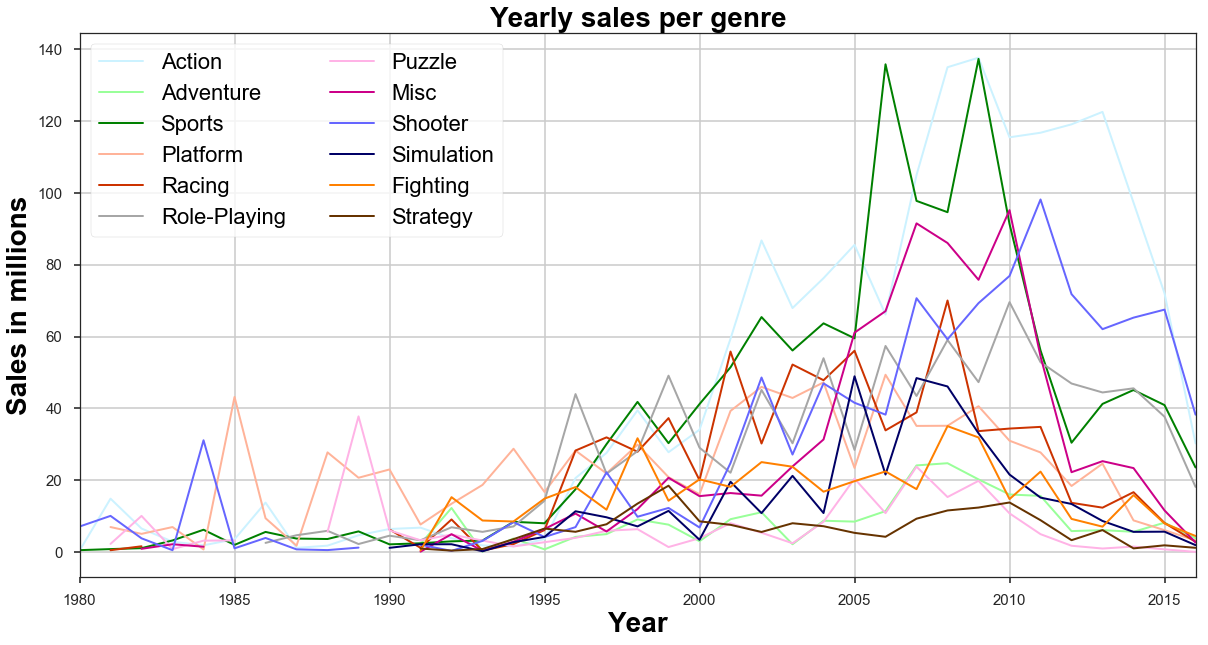

In [15]:
fig, ax = plt.subplots()

ax.plot(sales['Action'], color = '#ccf2ff')
ax.plot(sales['Adventure'],color = '#99ff99')
ax.plot(sales['Sports'], color = '#008000')
ax.plot(sales['Platform'],color = '#ffb399')
ax.plot(sales['Racing'], color = '#cc3300')
ax.plot(sales['Role-Playing'], color = '#a6a6a6')
ax.plot(sales['Puzzle'], color = '#ffb3e6')
ax.plot(sales['Misc'],color = '#cc0088')
ax.plot(sales['Shooter'], color = '#6666ff')
ax.plot(sales['Simulation'],color = '#000066')
ax.plot(sales['Fighting'],color = '#ff8000')
ax.plot(sales['Strategy'], color = '#663300')

ax.set_xlabel('Year')
ax.set_ylabel('Sales in millions')

ax.set_xlim(1980, 2016)
ax.legend(frameon=True, ncol=2, loc='upper left')
plt.title('Yearly sales per genre')

The above graph shows th yearly sales of each genre. Although it looks a bit messy it is still clear to see the peaks of each genre and changes overtime. At the moment we can see that the top four genres are Action, Sports, Role-Playing and shooter. To take a better look at it i will take certain genres to graph below in order to better see what genres were best in what year.

Text(0.5,1,'Yearly sales per genre')

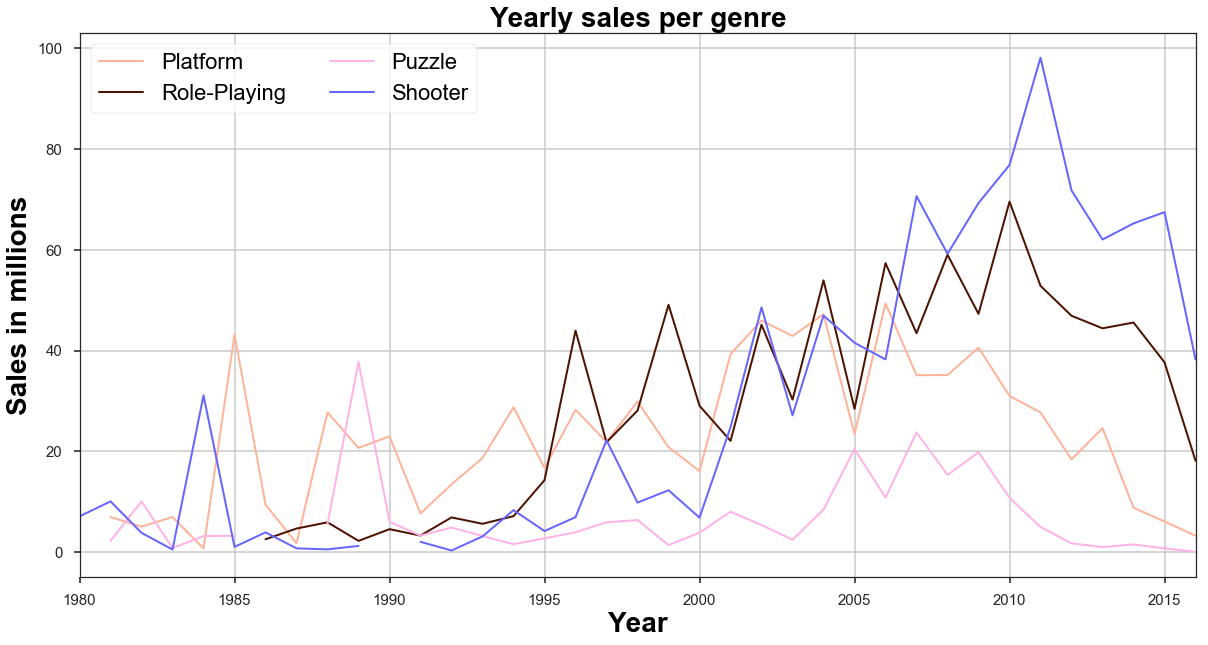

In [16]:
fig, ax = plt.subplots()

ax.plot(sales['Platform'],color = '#ffb399') 
ax.plot(sales['Role-Playing'], color = '#4d1300')
ax.plot(sales['Puzzle'], color = '#ffb3e6')
ax.plot(sales['Shooter'], color = '#6666ff')
 
ax.set_xlabel('Year')
ax.set_ylabel('Sales in millions')

ax.set_xlim(1980, 2016)
ax.legend(frameon=True, ncol=2, loc='upper left')
plt.title('Yearly sales per genre')

We can see in the early years that te most sold genre fluctuates betwwen genres. This is most likely because people want to try different types of games to see what the prefer. It is also possible that companies want to see what genres are the best to sell so they release various different games over the early years.

Text(0.5,1,'Best selling genres in recent years')

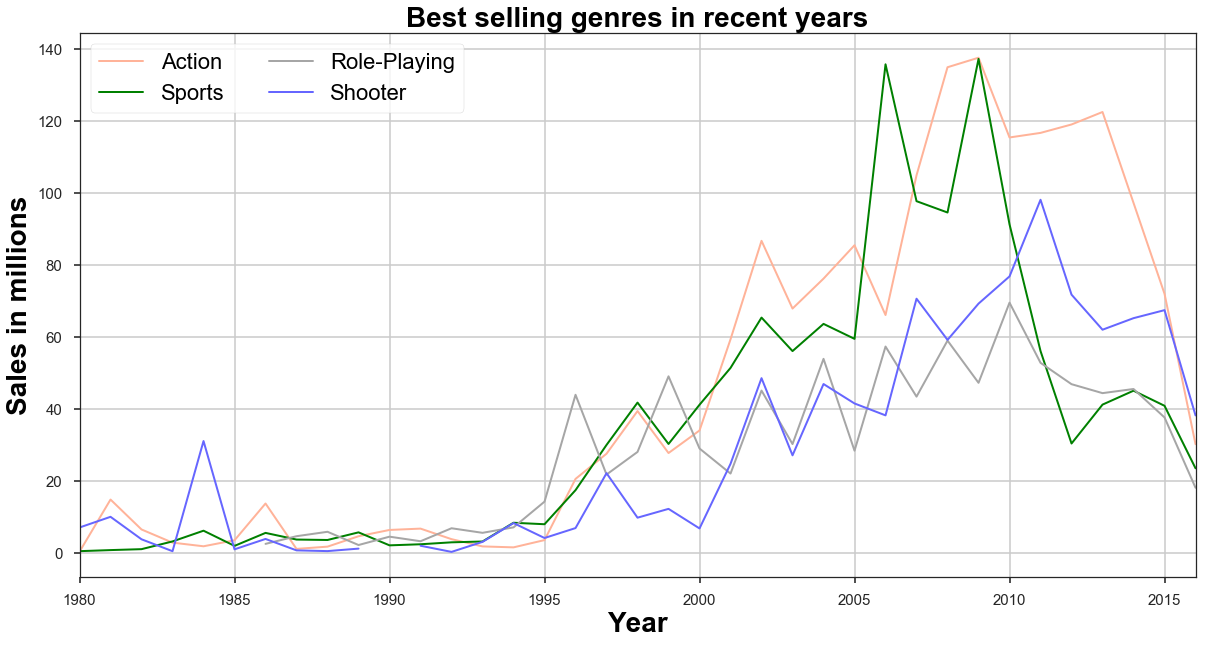

In [29]:
fig, ax = plt.subplots()

ax.plot(sales['Action'], color = '#ffb399')
ax.plot(sales['Sports'], color = '#008000')
ax.plot(sales['Role-Playing'], color = '#a6a6a6')
ax.plot(sales['Shooter'], color = '#6666ff')
 
ax.set_xlabel('Year')
ax.set_ylabel('Sales in millions')

ax.set_xlim(1980, 2016)
ax.legend(frameon=True, ncol=2, loc='upper left')
plt.title('Best selling genres in recent years')

Text(0.5,1,'Best selling genres released in recent years')

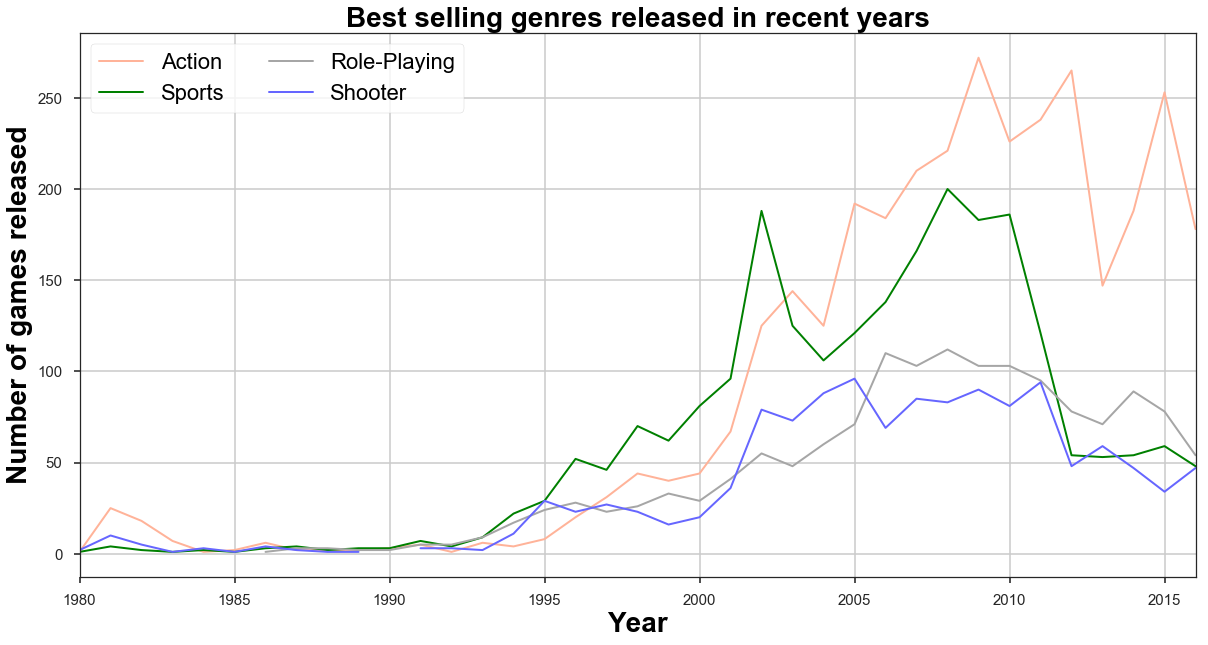

In [28]:
fig, ax = plt.subplots()

ax.plot(counts['Action'], color = '#ffb399')
ax.plot(counts['Sports'], color = '#008000')
ax.plot(counts['Role-Playing'], color = '#a6a6a6')
ax.plot(counts['Shooter'], color = '#6666ff')
 
ax.set_xlabel('Year')
ax.set_ylabel('Number of games released')

ax.set_xlim(1980, 2016)
ax.legend(frameon=True, ncol=2, loc='upper left')
plt.title('Best selling genres released in recent years')

The above two graphs show the best performing genres of the last few years. we can see that the decrease in sales is normally due to a decrease in releases. However it may be good to graph them on the same graph to get a better look.  

Text(0.5,1,'games created versus sold for action genre')

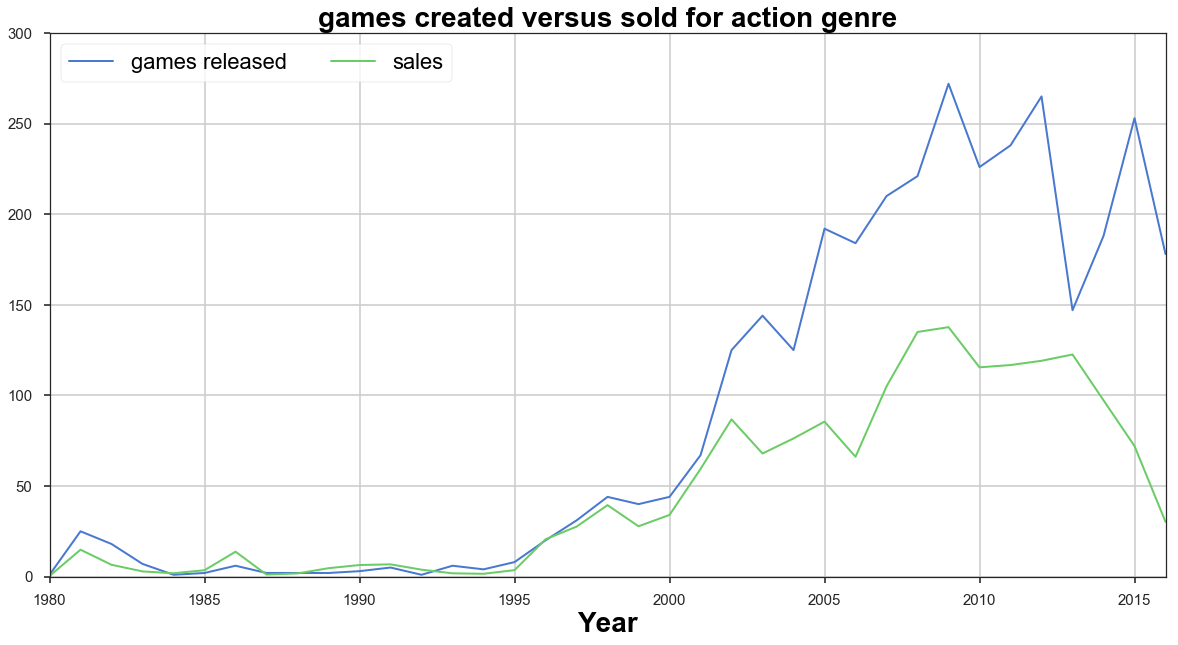

In [19]:
fig, ax = plt.subplots()

ax.plot(counts['Action'], label = 'games released')
ax.plot(sales['Action'], label = 'sales')
 
ax.set_xlabel('Year')
 

ax.set_xlim(1980, 2016)
ax.set_ylim(0,300)
ax.legend(frameon=True, ncol=2, loc='upper left')
plt.title('games created versus sold for action genre')

Text(0.5,1,'games created versus sold for sports genre')

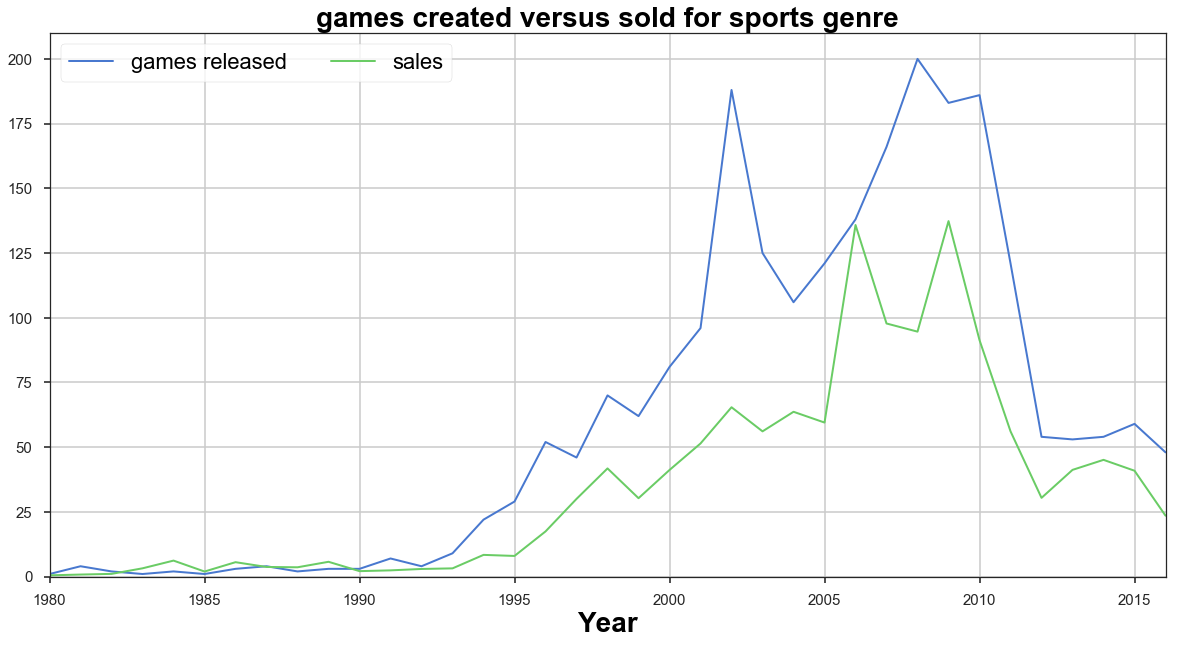

In [20]:
 fig, ax = plt.subplots()

ax.plot(counts['Sports'], label = 'games released')
ax.plot(sales['Sports'], label = 'sales')
 
ax.set_xlabel('Year')
 

ax.set_xlim(1980, 2016)
ax.set_ylim(0,210)
ax.legend(frameon=True, ncol=2, loc='upper left')
plt.title('games created versus sold for sports genre')

Text(0.5,1,'games created versus sold for role-playing genre')

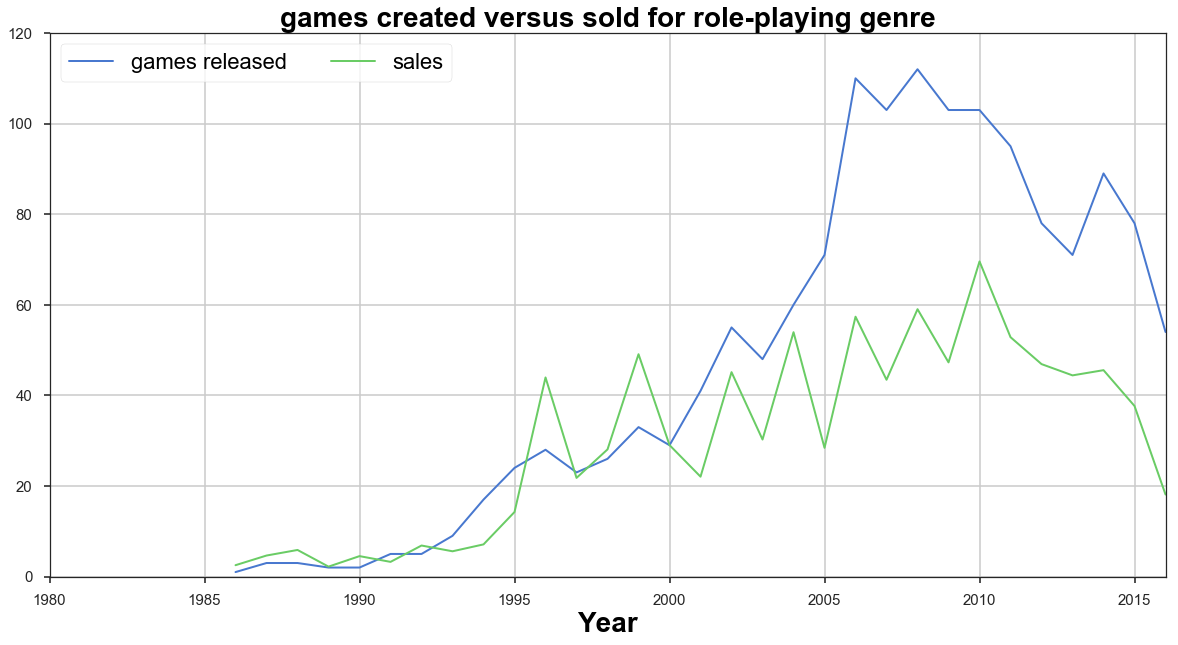

In [21]:
 fig, ax = plt.subplots()

ax.plot(counts['Role-Playing'], label = 'games released')
ax.plot(sales['Role-Playing'], label = 'sales')
 
ax.set_xlabel('Year')
 

ax.set_xlim(1980, 2016)
ax.set_ylim(0,120)
ax.legend(frameon=True, ncol=2, loc='upper left')
plt.title('games created versus sold for role-playing genre')

Text(0.5,1,'games created versus sold for shooter genre')

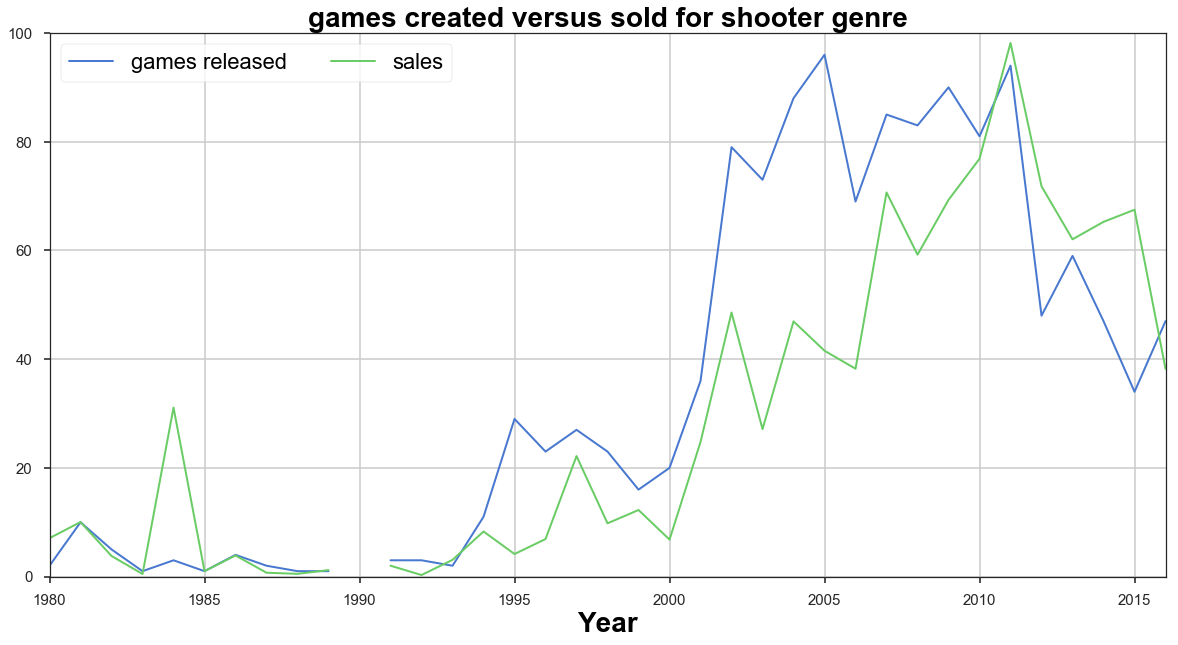

In [22]:
 fig, ax = plt.subplots()

ax.plot(counts['Shooter'], label = 'games released')
ax.plot(sales['Shooter'], label = 'sales')
 
ax.set_xlabel('Year')
 

ax.set_xlim(1980, 2016)
ax.set_ylim(0,100)
ax.legend(frameon=True, ncol=2, loc='upper left')
plt.title('games created versus sold for shooter genre')

## Market investment

The next thing to look at when looking at the growth is looking at the investment into the market. We can do this by looking at the amount of companiues within it and by the investm,ent by these companies.

Text(0.5,1,'Publishers vs Developers')

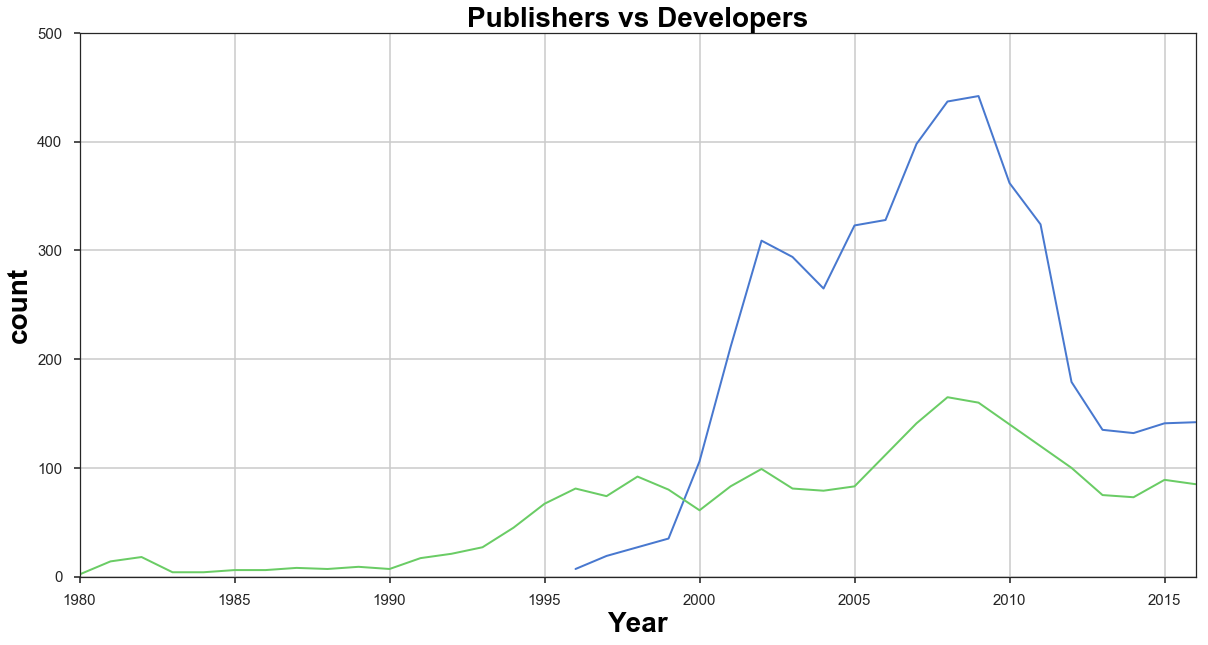

In [23]:
fig, ax = plt.subplots()

ax.plot(counts['Developer'])
ax.plot(counts['Publisher'])
ax.set_xlabel("Year")

ax.set_xlabel('Year')
ax.set_ylabel('count')
ax.set_xlim(1980, 2016)
ax.set_ylim(0, 500)

plt.title('Publishers vs Developers')

The above shows the amount of publishers and developers in the industry over the last 30 years. We can see that there was massive investment into the market from 1999 until the crash around 2008 to 2009. However we can see that investment has started to increase again since 2014. Now to look at how much investment these companies have put in over the thirty years.

Text(0,0.5,'count')

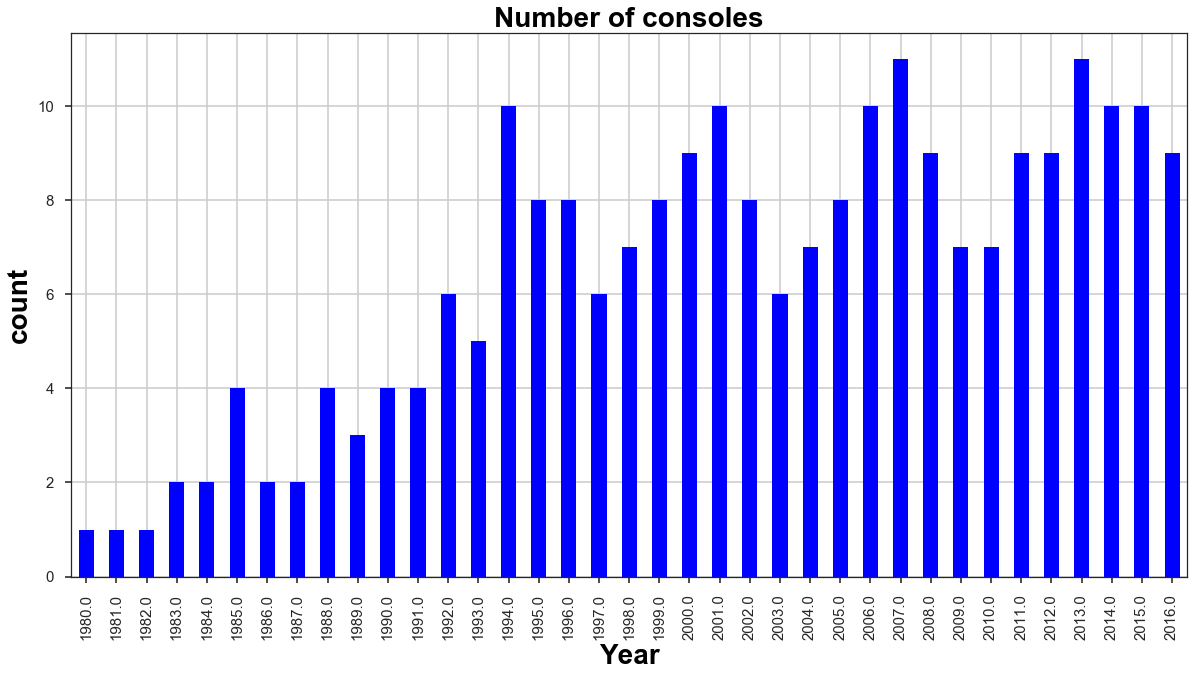

In [24]:
ax = counts['Platform'].plot(kind='bar', title="Number of consoles",color = 'b')
ax.set_xlabel("Year")
ax.set_ylabel('count')

(1980, 2016)

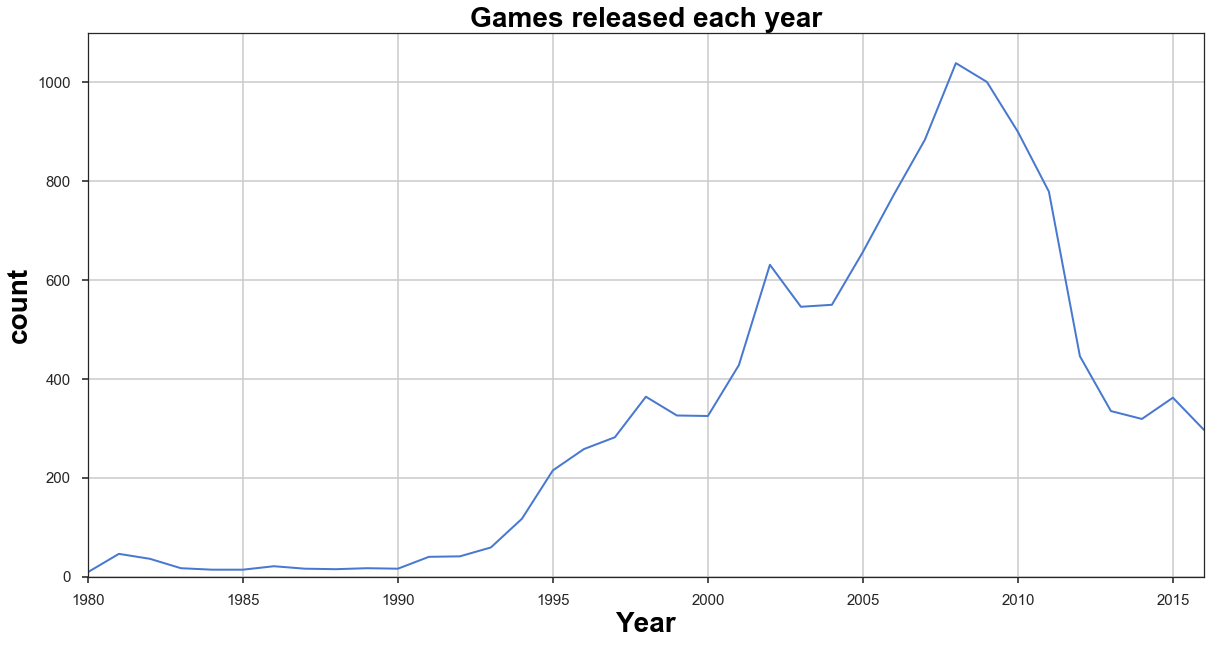

In [25]:
ax = counts['Name'].plot(kind='line', title="Games released each year")
ax.set_xlabel("Year")
ax.set_ylabel("count")
ax.set_ylim(0, 1100)
ax.set_xlim(1980, 2016)

The above two graphs show the amount of consoles games are released on each year ant the bottom one shows each individual game released each year. We can see that the amount of consoles available to each publisher to release a game on has increased over the thirthy years and it is possible also to see when new consoles are released. As regards to the games released it follows a simmilar trend to the sales, which makes sense due tio the number of publishers and developers decreasing. There is also an increase in 2015.

Text(0.5,1,'Recent game sales per console')

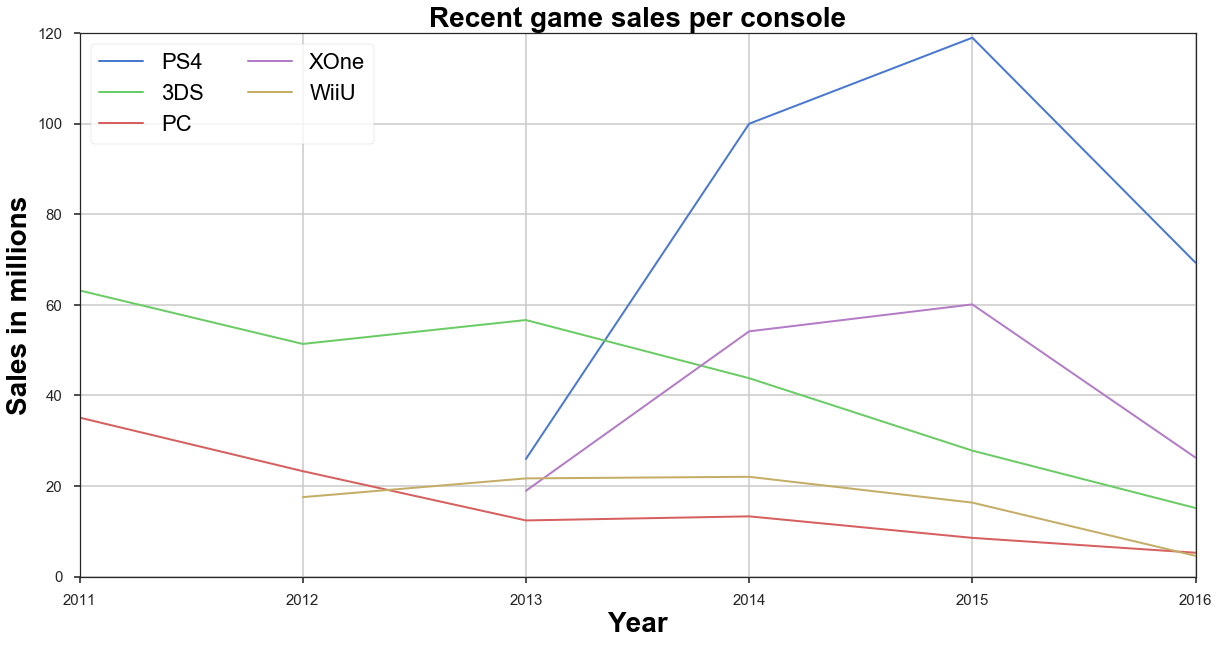

In [26]:
fig, ax = plt.subplots()

ax.plot(sales['PS4'])
ax.plot(sales['3DS'])
ax.plot(sales['PC'])
ax.plot(sales['XOne'])
ax.plot(sales['WiiU'])

ax.set_xlabel("Year")
ax.set_ylabel("Sales in millions")
ax.set_ylim(0, 120)
ax.set_xlim(2011, 2016)
ax.legend( frameon=True, ncol=2, loc='upper left')
plt.title('Recent game sales per console')

The above graph shows the recent game sales per console. We can see that older consoles and pc has declined, however, the two new consoles have boosted sales with a dip in 2016.

# Conclusions - How has the industry grown, where to go now?

- Choppy start from 1980 until 1995.
- Large investment into the industry up until 2008 when the crash hit.
- Investment starting to increase again
- Evident that companies are no longer relying solely on game sales for profits, Good idea to look into this with more data on the industry.
- Action, sports, role-playing and shooter the best genres of game to make right now and should be released on the xbox one and/or the ps4.

# Aside - 2016 figures and better data

- Since the data was recorded in January of 2017 the figures for 2016 may not be fully complete
- Since the data was solely based on games it is not possible to do a complete in depth analysis on why the market value is increasing, it would be good to get more data to have a deeper look into this.